In [12]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [13]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [14]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")
fname = "val_gt2_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_model = pd.read_csv(fname, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = ['air_temp[K]', 'temp_0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for colname in colnames:
    
    df_model[f'{colname[:-3]}[C]'] = df_model[colname] - 273.15

df_model.head()

,Unnamed: 0,time,temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],temp_0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-07-09 00:00:00,271.65,271.641946,270.436577,268.428806,266.998216,-1.5,-1.508054,-2.713423,-4.721194,-6.151784
1,1,2011-07-09 01:00:00,273.15,271.613233,270.443111,268.435243,267.018140,0.0,-1.536767,-2.706889,-4.714757,-6.131860
2,2,2011-07-09 02:00:00,273.15,271.590586,270.447852,268.439987,267.033567,0.0,-1.559414,-2.702148,-4.710013,-6.116433
3,3,2011-07-09 03:00:00,273.15,271.572086,270.451548,268.443735,267.046224,0.0,-1.577914,-2.698452,-4.706265,-6.103776
4,4,2011-07-09 04:00:00,273.15,271.556502,270.454594,268.446863,267.057073,0.0,-1.593498,-2.695406,-4.703137,-6.092927


Now let's have a look at the data.

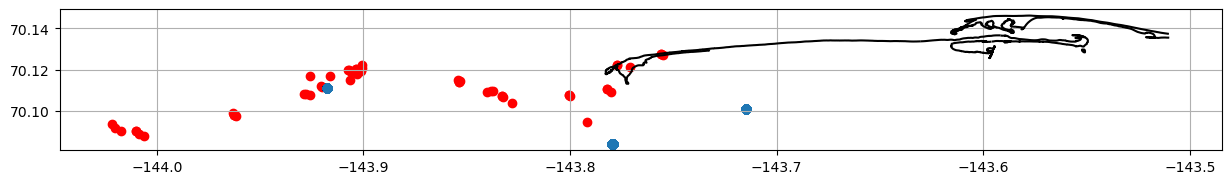

In [15]:
# the blue points are the points with data

p1 = (-143.77901, 70.08405)  # main land
p2 = (-143.71484, 70.10072)  # main land, but a bit north-eastward
p3 = (-143.91774, 70.11128)  # Arey Island


In [16]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


In [17]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


This data starts and ends at 2011-07-08 07:00:00 and 2011-09-28 19:00:00 respectively.

Let's save this dataset to be used as initial condition in a validation simulation.

In [18]:
save_path = os.path.join(parent, "database/ts_datasets/ground_temperature_erikson.csv")

df_erikson.to_csv(save_path)

Now let's have a look.

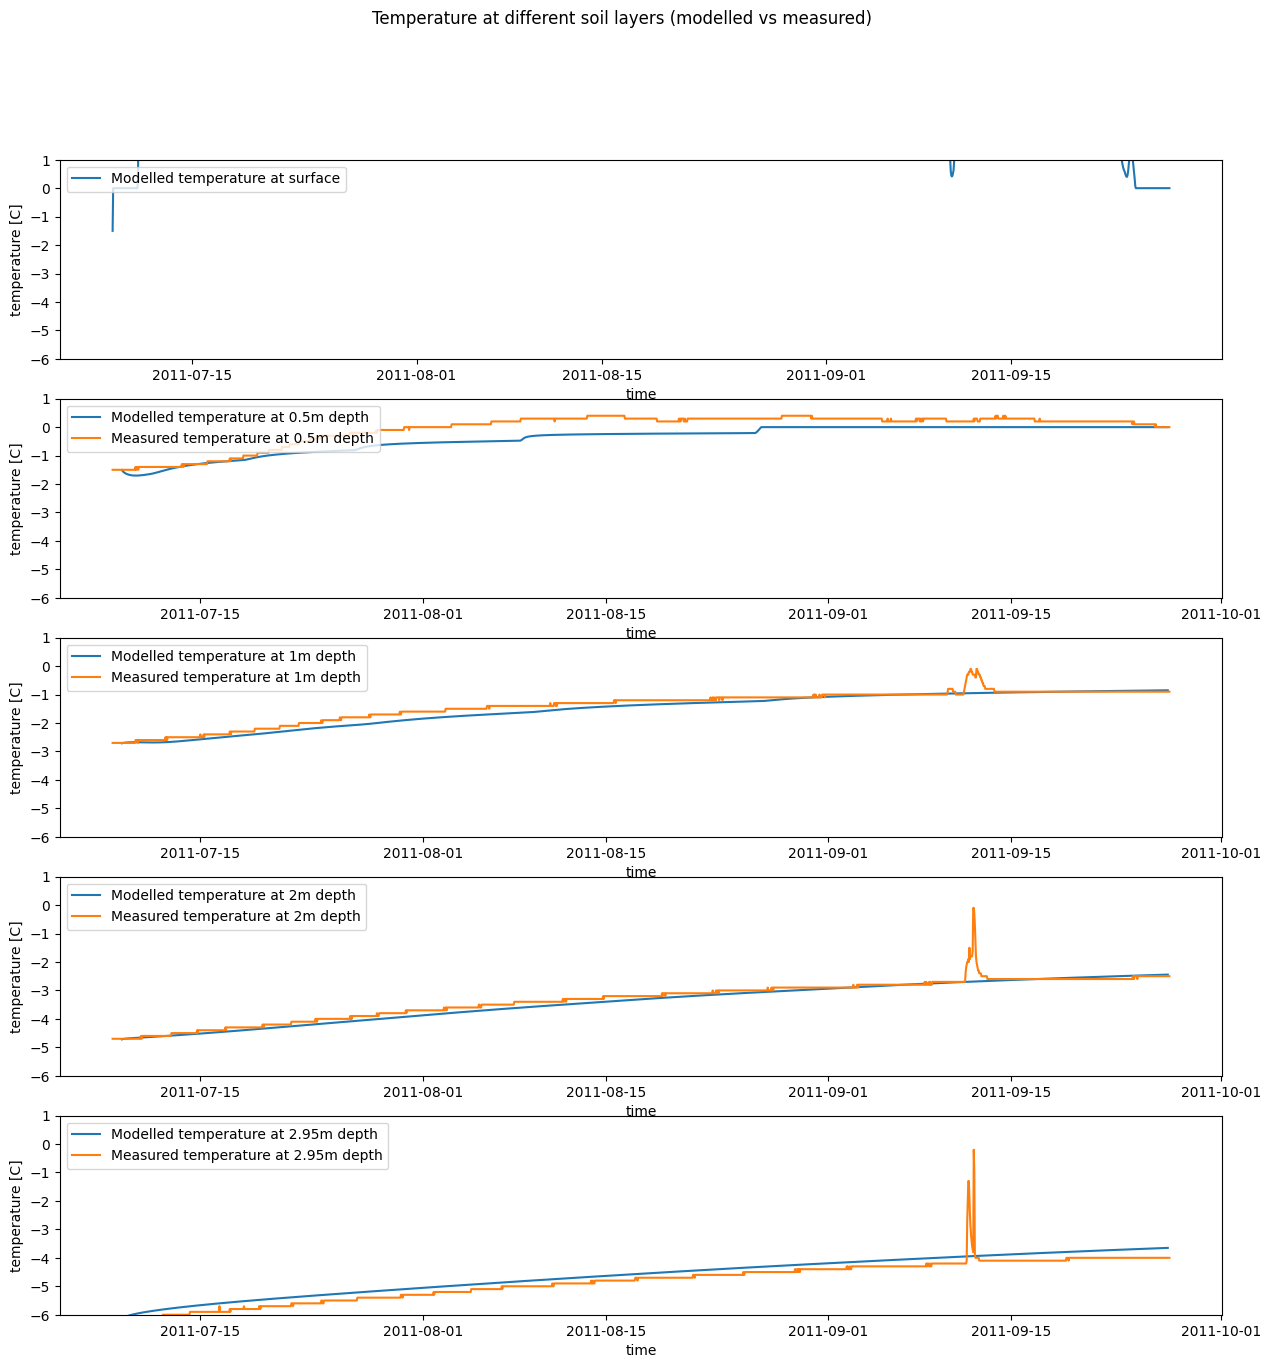

In [23]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))

ax0, ax1, ax2, ax3, ax4 = axs

ax0.plot(df_model['time'], df_model['temp_0m[C]'], label='Modelled temperature at surface')

ax1.plot(df_model['time'], df_model['temp_0.5m[C]'], label='Modelled temperature at 0.5m depth')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], label='Measured temperature at 0.5m depth')

ax2.plot(df_model['time'], df_model['temp_1.0m[C]'], label='Modelled temperature at 1m depth')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], label='Measured temperature at 1m depth')

ax3.plot(df_model['time'], df_model['temp_2.0m[C]'], label='Modelled temperature at 2m depth')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], label='Measured temperature at 2m depth')

ax4.plot(df_model['time'], df_model['temp_2.95m[C]'], label='Modelled temperature at 2.95m depth')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], label='Measured temperature at 2.95m depth')

for ax in axs:
    ax.legend(loc='upper left')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.set_ylim((-6, 1))

fig.suptitle("Temperature at different soil layers (modelled vs measured)")

plt.show()

That seems pretty nice already, let's zoom in to the summer and early fall of 2011.

In [20]:
mask = (df_model.time.dt.month >= 7) * (df_model.time.dt.month <= 9) * (df_model.time.dt.year == 2011)

df_model_zoom = df_model[mask]

df_model_zoom.head()

,Unnamed: 0,time,temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],temp_0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-07-09 00:00:00,271.65,271.641946,270.436577,268.428806,266.998216,-1.5,-1.508054,-2.713423,-4.721194,-6.151784
1,1,2011-07-09 01:00:00,273.15,271.613233,270.443111,268.435243,267.018140,0.0,-1.536767,-2.706889,-4.714757,-6.131860
2,2,2011-07-09 02:00:00,273.15,271.590586,270.447852,268.439987,267.033567,0.0,-1.559414,-2.702148,-4.710013,-6.116433
3,3,2011-07-09 03:00:00,273.15,271.572086,270.451548,268.443735,267.046224,0.0,-1.577914,-2.698452,-4.706265,-6.103776
4,4,2011-07-09 04:00:00,273.15,271.556502,270.454594,268.446863,267.057073,0.0,-1.593498,-2.695406,-4.703137,-6.092927


and replot.

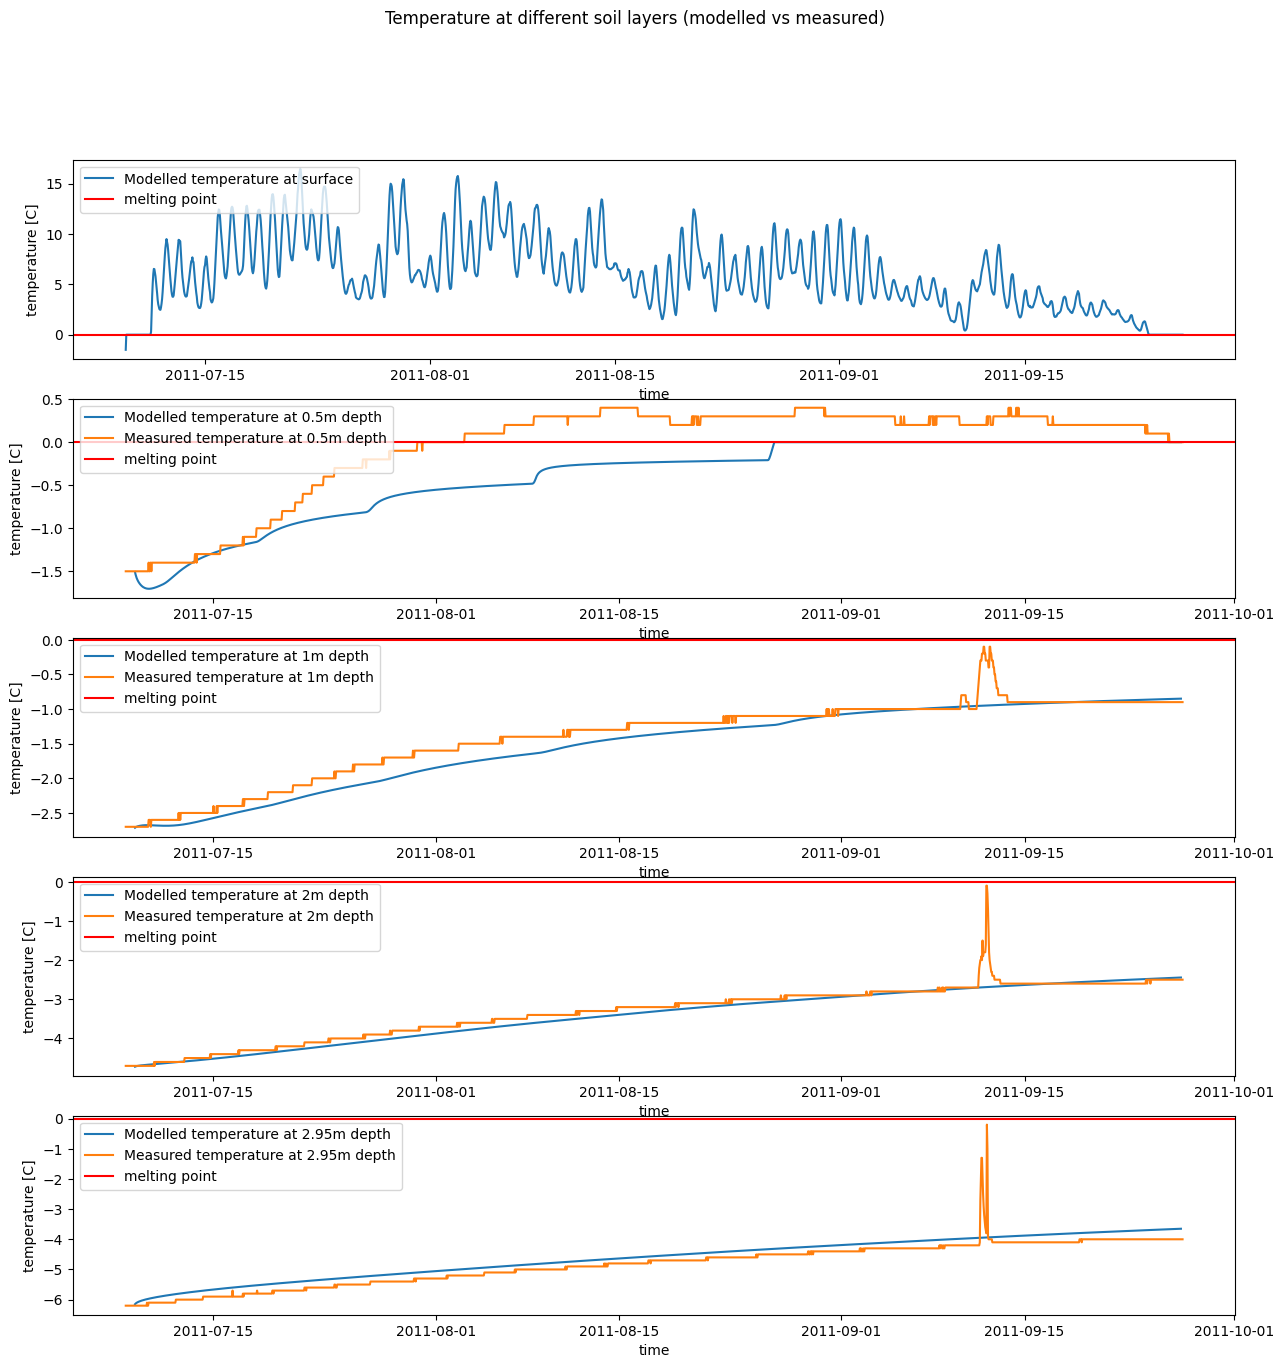

In [21]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))

ax0, ax1, ax2, ax3, ax4 = axs

ax0.plot(df_model_zoom['time'], df_model_zoom['temp_0m[C]'], label='Modelled temperature at surface')

ax1.plot(df_model_zoom['time'], df_model_zoom['temp_0.5m[C]'], label='Modelled temperature at 0.5m depth')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], label='Measured temperature at 0.5m depth')

ax2.plot(df_model_zoom['time'], df_model_zoom['temp_1.0m[C]'], label='Modelled temperature at 1m depth')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], label='Measured temperature at 1m depth')

ax3.plot(df_model_zoom['time'], df_model_zoom['temp_2.0m[C]'], label='Modelled temperature at 2m depth')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], label='Measured temperature at 2m depth')

ax4.plot(df_model_zoom['time'], df_model_zoom['temp_2.95m[C]'], label='Modelled temperature at 2.95m depth')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], label='Measured temperature at 2.95m depth')

for ax in axs:
    ax.axhline(y=0, color='red', label='melting point')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.legend(loc='upper left')


fig.suptitle("Temperature at different soil layers (modelled vs measured)")

plt.show()

KeyError: 'air_temp[K]'

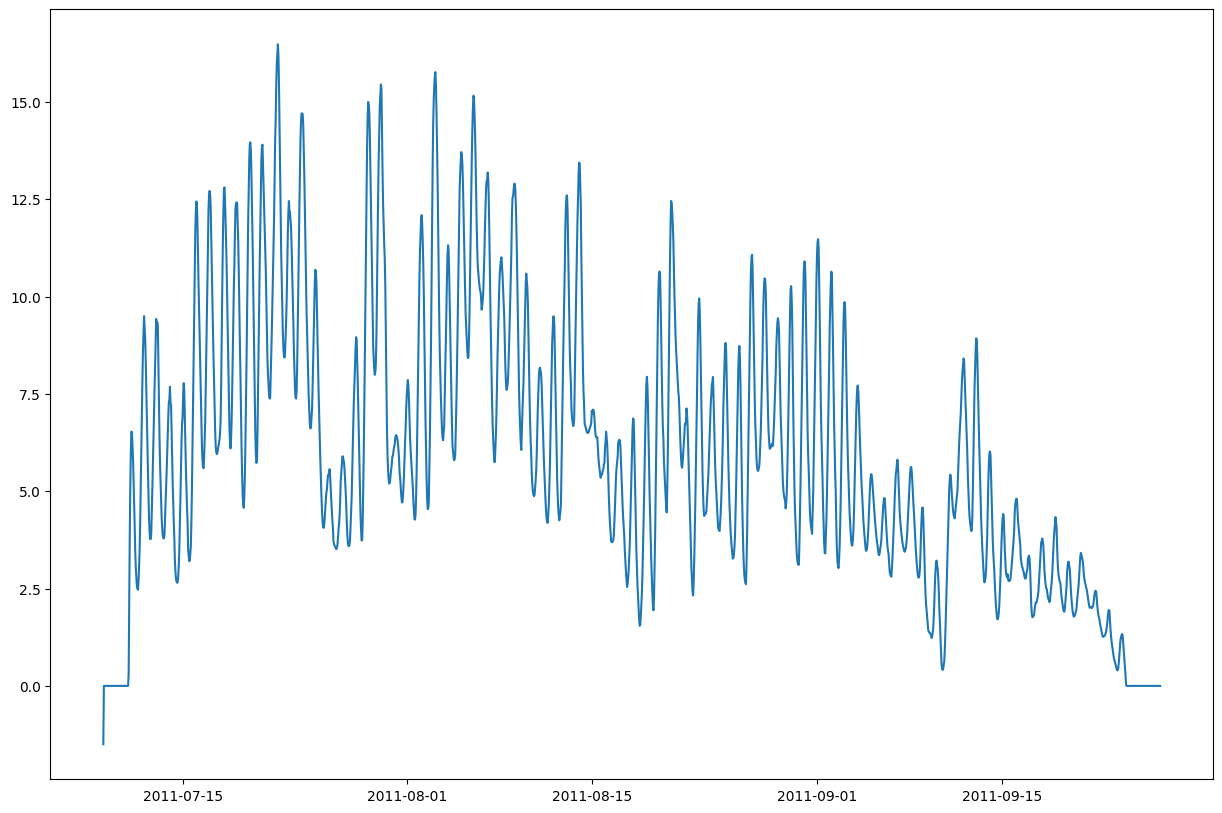

In [27]:
fig, axs = plt.subplots(1, figsize=(15, 10))

axs.plot(df_model_zoom['time'], df_model_zoom['temp_0m[C]'], 'C0', label='Modelled temperature at ground surface')
axs.plot(df_model_zoom['time'], df_model_zoom['air_temp[K]'], 'C0--', label='ERA5 temperature at 2m above ground surface')

axs.plot(df_model_zoom['time'], df_model_zoom['temp_0.5m[C]'], 'C1', label='Modelled temperature at 0.5m depth')
axs.plot(df_erikson['time'], df_erikson['T50cm'], 'C1--', label='Measured temperature at 0.5m depth')

axs.plot(df_model_zoom['time'], df_model_zoom['temp_1.0m[C]'], 'C2', label='Modelled temperature at 1m depth')
axs.plot(df_erikson['time'], df_erikson['T100cm'], 'C2--', label='Measured temperature at 1m depth')

axs.plot(df_model_zoom['time'], df_model_zoom['temp_2.0m[C]'], 'C3', label='Modelled temperature at 2m depth')
axs.plot(df_erikson['time'], df_erikson['T200cm'], 'C3--', label='Measured temperature at 2m depth')

axs.plot(df_model_zoom['time'], df_model_zoom['temp_2.95m[C]'], 'C4', label='Modelled temperature at 2.95m depth')
axs.plot(df_erikson['time'], df_erikson['T295cm'], 'C4--', label='Measured temperature at 2.95m depth')

# for ax in axs:
axs.axhline(y=0, color='red', label='melting point')
axs.set_xlabel('time')
axs.set_ylabel('temperature [C]')
axs.legend(loc='upper right')


fig.suptitle("Temperature at different soil layers (modelled vs measured)")

plt.show()

Let's plot the different surface heat fluxes over this

In [ ]:
fig, axs = plt.subplots(1, figsize=(10, 10))

axs.plot(df_model_zoom['time'], df_model_zoom['total_heat_flux[W/m2]'], 'C0', label='Modelled total surface heat flux [W/m2]')
axs.plot(df_model_zoom['time'], df_model_zoom['solar_radiation_flux[W/m2]'], 'C1', label='Modelled solar radiation flux [W/m2]')
axs.plot(df_model_zoom['time'], df_model_zoom['long_wave_radiation_flux[W/m2]'], 'C2', label='ERA5 long wave flux [W/m2]')
axs.plot(df_model_zoom['time'], df_model_zoom['latent_heat_flux[W/m2]'], 'C3', label='ERA5 latent heat flux [W/m2]')
axs.plot(df_model_zoom['time'], df_model_zoom['convective_heat_flux[W/m2]'], 'C4', label='Modellec convective heat flux [W/m2]')


# for ax in axs:
axs.axhline(y=0, color='k', label='flux=0')
axs.set_xlabel('time')
axs.set_ylabel('Surface heat flux [W/m2]')
axs.legend(loc='upper right')

fig.suptitle("Heat fluxes at surface")

plt.show()